In [1]:
# imports

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# get the btc price
df = yf.download('ETH-USD')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000
2017-11-15,337.963989,340.911987,329.812988,333.356995,333.356995,722665984
2017-11-16,333.442993,336.158997,323.605988,330.924011,330.924011,797254016
2017-11-17,330.166992,334.963989,327.523010,332.394012,332.394012,621732992


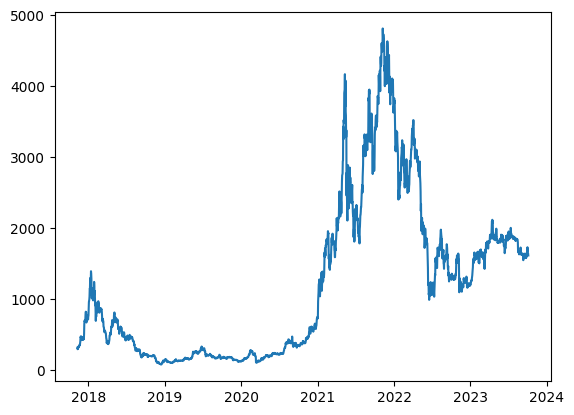

In [4]:
# visualize BTC price
plt.plot(df.index, df['Adj Close'])

In [5]:
# Train, test, split
to_row = int(len(df)*0.9)

# training data
training_data = list(df[0:to_row]['Adj Close'])

# testing data
testing_data = list(df[to_row:]['Adj Close'])

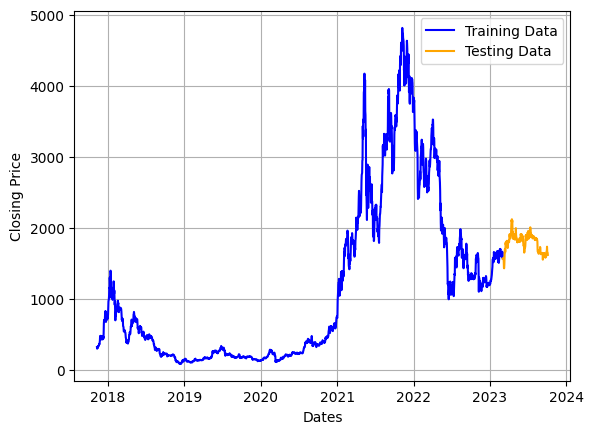

In [6]:
# let's visualize training and testing data
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label='Training Data')
plt.plot(df[to_row:]['Adj Close'], 'orange', label='Testing Data')
plt.legend()

In [7]:
model_predictions = [] # to store model predictions
number_test_observations = len(testing_data)

In [8]:
# fit and predict
for i in range(number_test_observations):
    model = ARIMA(training_data, order=(4,1,0)) # 4,1,0 p,d,q values
    model_fit = model.fit() # fit the model
    output = model_fit.forecast() # predict
    yhat = output[0] # get output
    model_predictions.append(yhat) # store output
    actual_test_value = testing_data[i] # test value
    training_data.append(actual_test_value) # update test value

In [9]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2156
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -12361.440
Date:                Thu, 05 Oct 2023   AIC                          24732.879
Time:                        15:24:49   BIC                          24761.257
Sample:                             0   HQIC                         24743.260
                               - 2156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0655      0.011     -5.924      0.000      -0.087      -0.044
ar.L2          0.0133      0.010      1.338      0.181      -0.006       0.033
ar.L3          0.0328      0.011      3.044      0.0

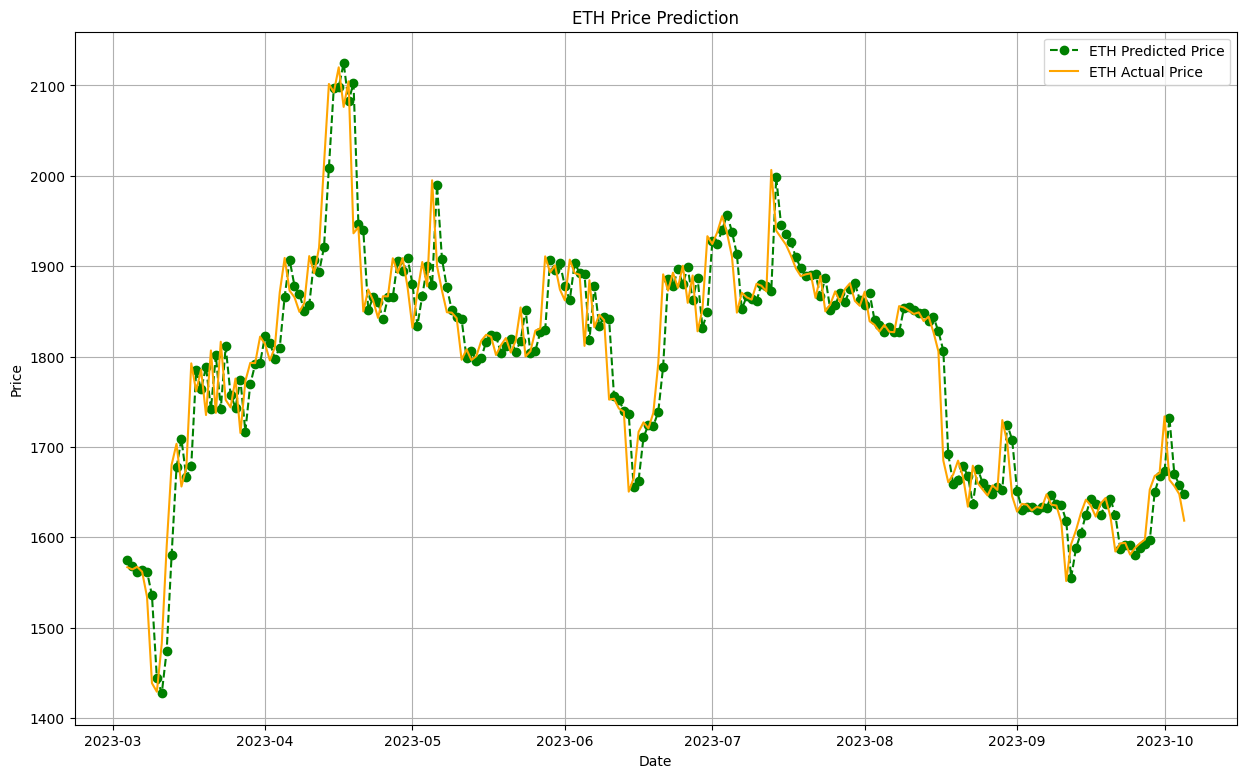

In [10]:
# let's visualize the results
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range,
         model_predictions,
         color='green',
         marker='o',
         linestyle='dashed',
         label='ETH Predicted Price')

plt.plot(date_range,
         testing_data,
         color='orange',
         label='ETH Actual Price')

plt.title('ETH Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
# report performance
MAPE = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))

print('MAPE: ' + str(MAPE))

MAPE: 0.015503755475748882


In [12]:
# 1.5% MAPE means that the model is accurate (98.5% accuracy)

In [13]:
# Extend the model to forecast the next 30 days
future_predictions = [] # to store future predictions
future_dates = pd.date_range(start=df.index[-1], periods=31)[1:]  # create future dates

In [14]:
# use the last 'to_row' data as the training data and all the model_predictions as testing data to make future predictions
training_data = list(df[0:to_row]['Adj Close']) + model_predictions 

# fit and predict for next 30 days
for i in range(30):
    model = ARIMA(training_data, order=(4,1,0)) # 4,1,0 p,d,q values
    model_fit = model.fit() # fit the model
    output = model_fit.forecast() # predict
    yhat = output[0] # get output
    future_predictions.append(yhat) # store output
    training_data.append(yhat) # update with predicted value

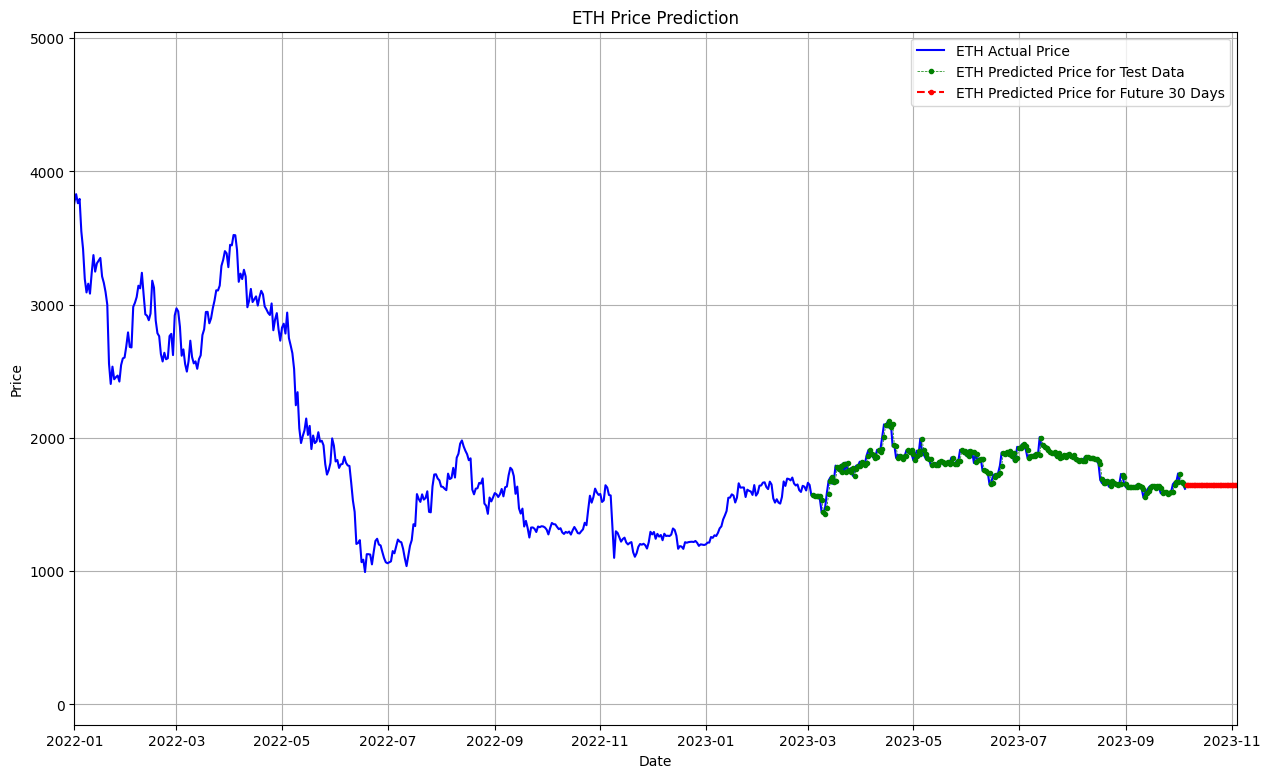

In [15]:
# let's visualize the results including future predictions
plt.figure(figsize=(15,9))
plt.grid(True)

plt.plot(df.index,
         df['Adj Close'],
         color='blue',
         label='ETH Actual Price')

plt.plot(date_range,
         model_predictions,
         color='green',
         marker='.',
         linestyle='dashed',
         linewidth=0.5,
         label='ETH Predicted Price for Test Data')

plt.plot(future_dates,
         future_predictions,
         color='red',
         marker='.',
         linestyle='dashed',
         label='ETH Predicted Price for Future 30 Days')

# Set x-axis limits to display data from 2022 onwards only
plt.xlim(pd.Timestamp('2022-01-01'), future_dates[-1])

plt.title('ETH Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2186
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -12514.639
Date:                Thu, 05 Oct 2023   AIC                          25039.279
Time:                        15:24:50   BIC                          25067.726
Sample:                             0   HQIC                         25049.677
                               - 2186                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0631      0.011     -5.810      0.000      -0.084      -0.042
ar.L2          0.0133      0.010      1.364      0.173      -0.006       0.032
ar.L3          0.0334      0.011      3.154      0.0

In [17]:
# generate future predictions with SARIMAX model
future_predictions = []  # to store future predictions

for i in range(30):
    model = SARIMAX(training_data, order=(4,1,0), seasonal_order=(1,1,1,12))  # Adjust seasonal_order as per the data’s seasonality
    model_fit = model.fit(disp=False)  # fit the model
    output = model_fit.forecast()  # predict
    yhat = output[0]  # get output
    future_predictions.append(yhat)  # store output
    training_data.append(yhat)  # update with predicted value

In [18]:
# create future dates
future_dates = pd.date_range(start=df.index[-1], periods=31)[1:]

In [19]:
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 2216
Model:             SARIMAX(4, 1, 0)x(1, 1, [1], 12)   Log Likelihood              -12634.657
Date:                              Thu, 05 Oct 2023   AIC                          25283.314
Time:                                      15:27:14   BIC                          25323.197
Sample:                                           0   HQIC                         25297.887
                                             - 2216                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0622      0.011     -5.771      0.000      -0.083      -0.041
ar.L2          0.01

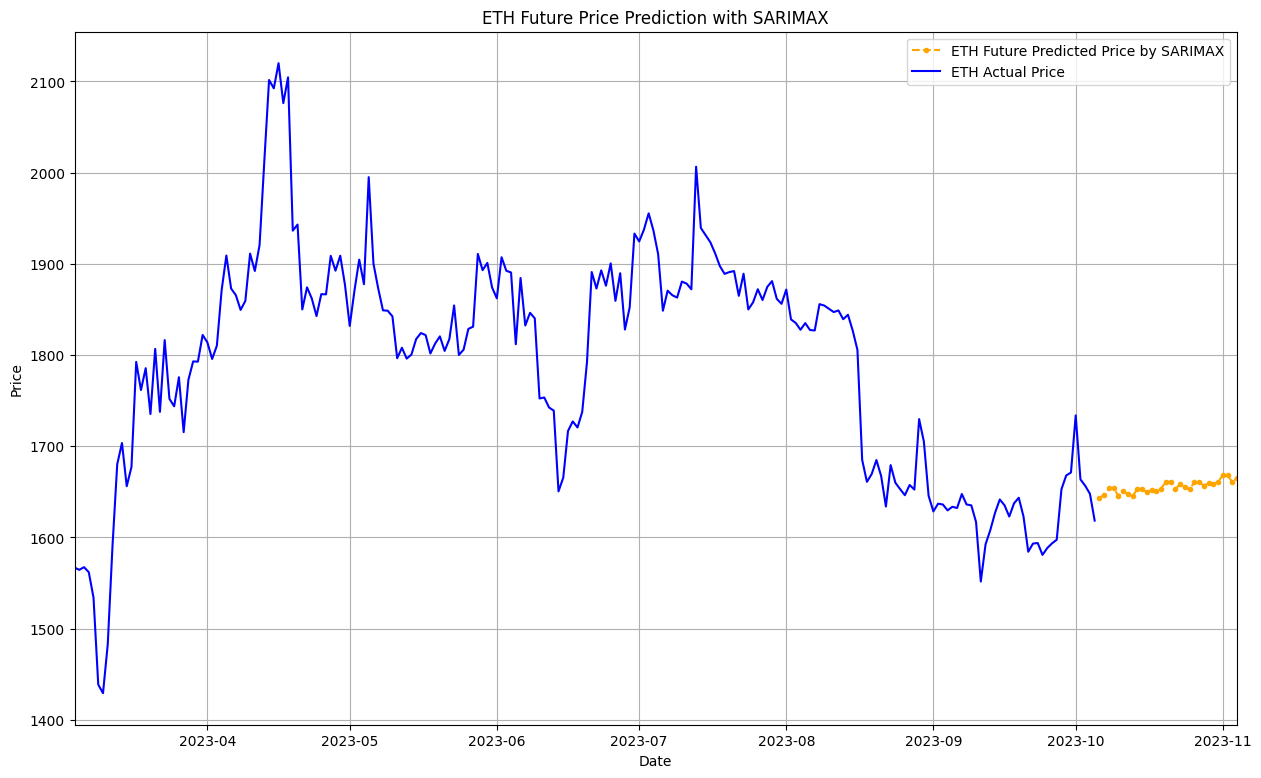

In [21]:
plt.figure(figsize=(15,9))
plt.grid(True)

# plot SARIMAX future predictions
plt.plot(future_dates, future_predictions, color='orange', marker='.', linestyle='dashed', label='ETH Future Predicted Price by SARIMAX')
plt.plot(df.index[to_row:], df['Adj Close'][to_row:], color='blue', label='ETH Actual Price')

plt.title('ETH Future Price Prediction with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Adjust the xlim to avoid empty space, change '2022-09-01' according to when your test data or future prediction starts
plt.xlim(pd.Timestamp(df.index[to_row]), future_dates[-1]) 

plt.show()